# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

## Generate Cities List

In [2]:
coords = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1200)
lon = np.random.uniform(low=-180.000, high=180.000, size=1200)
coords = zip(lats, lon)

# Identify nearest city for each lat, lng combination
for coord in coords:
    city = citipy.nearest_city(coord[0], coord[1]).city_name
    
# Only grab unique cities 
    if city not in cities:
        cities.append(city)
    elif len(cities) == 550:
        break
# Print the city count to confirm sufficient count
#print(cities)
len(cities)

529

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
weather_data = pd.DataFrame({'City': cities, 'Lat': "", 
                             'Lon': "",
                             'Cloud': "",
                             'Humidity': "",  
                             'MaxTemp': "", 
                             'Windspeed': ""})




In [23]:
for index,row in weather_data.iterrows():
    url = "http://api.openweathermap.org/data/2.5/weather?"
    city = row['City']
    response = requests.get(query_url + city).json()
    
    try:
        print(f"Index:{Index},Lat:{Lat},Lon:{Lon},cloudiness:{Cloud},Humidity:{Hum},Temperature:{MaxTemp},WindSpeed:{Windspeed}")
        
        weather_data.loc[index,"Lat"] = response['coord']['lat']
        weather_data.loc[index,"Lon"] = response['coord']['lon']
        weather_data.loc[index,"Cloud"]=response['clouds']['all']
        weather_data.loc[index,"Humidity"] = response['main']['humidity']
        weather_data.loc[index,"MaxTemp"]=response['main']['temp_max']
        weather_data.loc[index,"Windspeed"]=response['wind']['speed']
    except(KeyError,IndexError):
        print("Missing city moving on")

NameError: name 'Lat' is not defined

In [5]:
print(weather_data)
weather_data["MaxTemp"] = pd.to_numeric(weather_data.MaxTemp)
weather_data["Lat"] = pd.to_numeric(weather_data.Lat)
weather_data["Lon"] = pd.to_numeric(weather_data.Lon)
weather_data["Cloud"] = pd.to_numeric(weather_data.Cloud)
weather_data["Humidity"] = pd.to_numeric(weather_data.Humidity)
weather_data["Windspeed"] = pd.to_numeric(weather_data.Windspeed)

weather_data.dtypes

                 City      Lat      Lon Cloud Humidity MaxTemp Windspeed
0              bugiri   0.5714  33.7417    97       42   84.94      7.47
1         sakaiminato    35.55  133.233    75      100    55.4      6.91
2              castro -24.7911 -50.0119   100       81   71.06      9.35
3    illoqqortoormiut                                                   
4         yellowknife   62.456 -114.353    20       85       5     14.97
..                ...      ...      ...   ...      ...     ...       ...
524               reo  12.3167  -2.4667    97       13  101.68       5.5
525        whitehorse  60.7161 -135.054    20       77      -4      4.61
526        kautokeino  69.0125  23.0412   100       92   30.11     10.31
527        hervey bay -25.2986  152.853    64       89   75.99      1.01
528          ust-maya  60.4167  134.533   100       95   16.66      3.67

[529 rows x 7 columns]


City          object
Lat          float64
Lon          float64
Cloud        float64
Humidity     float64
MaxTemp      float64
Windspeed    float64
dtype: object

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_data.to_csv("Weather_Output.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

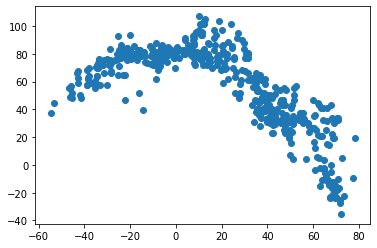

In [9]:
plt.scatter(weather_data["Lat"],weather_data["MaxTemp"])

## Latitude vs. Humidity Plot

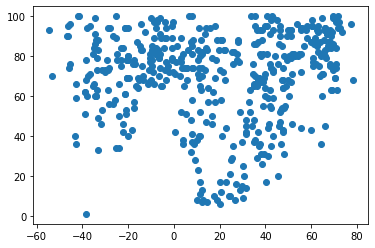

In [10]:
plt.scatter(weather_data["Lat"],weather_data["Humidity"])

## Latitude vs. Cloudiness Plot

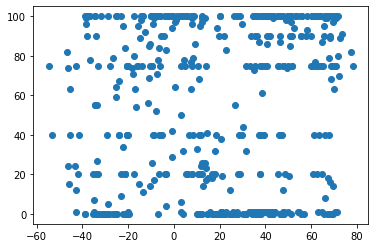

In [11]:
plt.scatter(weather_data["Lat"],weather_data["Cloud"])

## Latitude vs. Wind Speed Plot

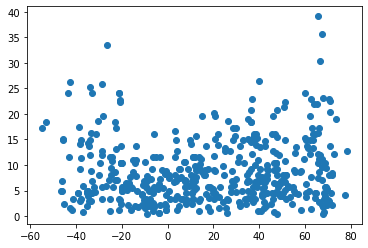

In [12]:
plt.scatter(weather_data["Lat"],weather_data["Windspeed"])

## Linear Regression

In [13]:
n_hem = weather_data.loc[weather_data["Lat"] >= 0.0]
n_hem.reset_index(inplace=True)
s_hem = weather_data.loc[weather_data["Lat"] < 0.0]
s_hem.reset_index(inplace=True)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

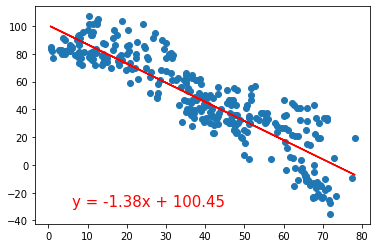

In [14]:
x_values = n_hem["Lat"]
y_values = n_hem['MaxTemp']
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.annotate(line_eq,(6,-30),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

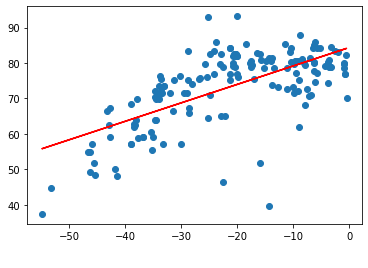

In [15]:
x_values = s_hem["Lat"]
y_values = s_hem['MaxTemp']
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

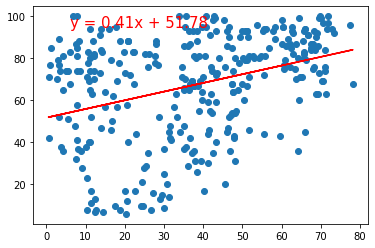

In [16]:
x_values = n_hem["Lat"]
y_values = n_hem['Humidity']
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.annotate(line_eq,(6,95),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

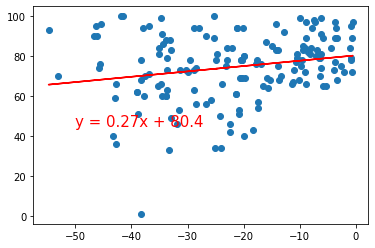

In [17]:
x_values = s_hem["Lat"]
y_values = s_hem['Humidity']
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.annotate(line_eq,(-50,45),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

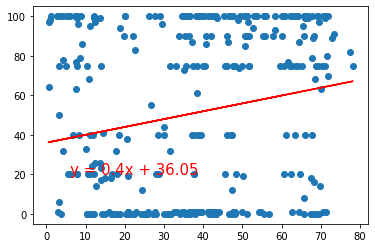

In [18]:
x_values = n_hem["Lat"]
y_values = n_hem['Cloud']
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.annotate(line_eq,(6,20),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

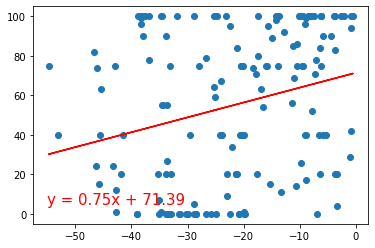

In [19]:
x_values = s_hem["Lat"]
y_values = s_hem['Cloud']
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.annotate(line_eq,(-55,5),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

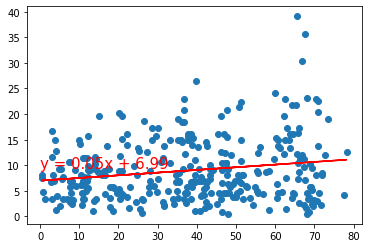

In [20]:
x_values = n_hem["Lat"]
y_values = n_hem['Windspeed']
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.annotate(line_eq,(0,9.5),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

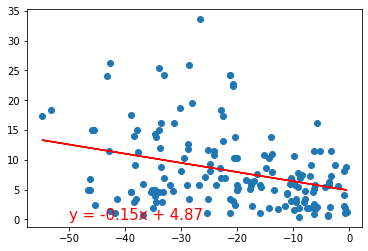

In [21]:
x_values = s_hem["Lat"]
y_values = s_hem['Windspeed']
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.annotate(line_eq,(-50,0),fontsize=15,color="red")
plt.plot(x_values,regress_values,"r-")